<a href="https://colab.research.google.com/github/NCRibeiro/Aplicativo-LiFE/blob/main/Desafio_de_Imagem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python matplotlib

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processando imagem: /content/drive/MyDrive/dataset_pessoas/ÍRIS.png


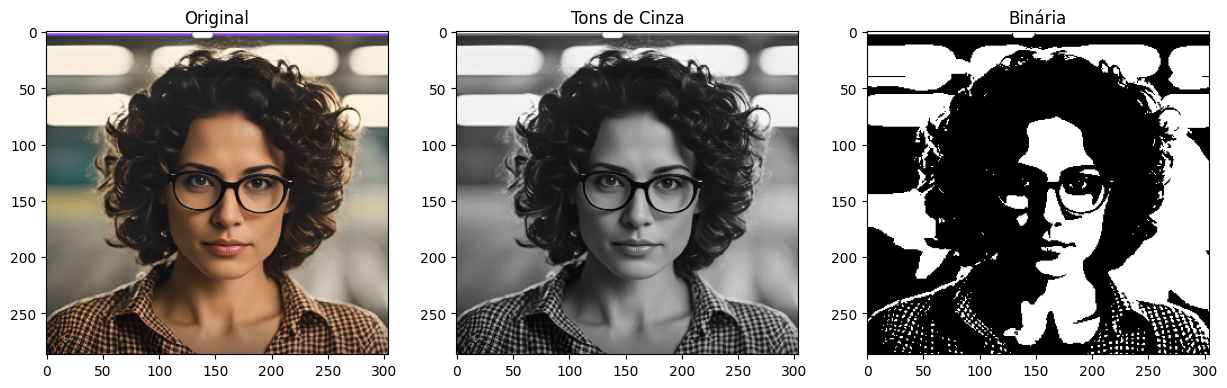

Processando imagem: /content/drive/MyDrive/dataset_pessoas/iris.png


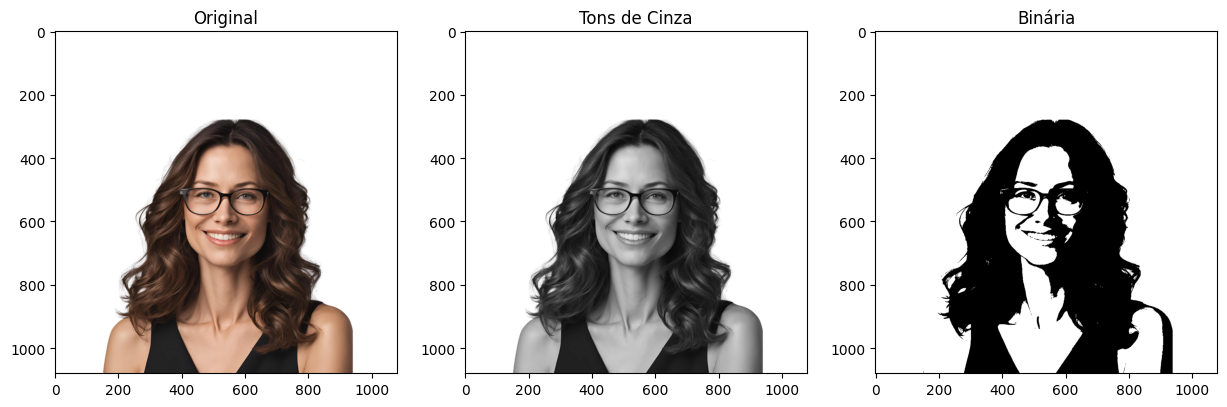

In [9]:
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

def converter_imagem(caminho_imagem, limiar=127):
    # (Mesma função converter_imagem da resposta anterior)
    try:
        imagem_original = cv2.imread(caminho_imagem)
        if imagem_original is None:
            print(f"Erro ao carregar a imagem: {caminho_imagem}")
            return None
        imagem_cinza = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2GRAY)
        _, imagem_binaria = cv2.threshold(imagem_cinza, limiar, 255, cv2.THRESH_BINARY)
        return imagem_original, imagem_cinza, imagem_binaria
    except Exception as e:
        print(f"Ocorreu um erro: {e}")
        return None

# Caminho para a pasta com as imagens
pasta_das_imagens = "dataset_pessoas" # Ajustado para o nome da sua pasta

# Update path to include your Drive location
pasta_das_imagens = "/content/drive/MyDrive/dataset_pessoas" # Update with the correct path in your Drive

# Listar os arquivos na pasta
arquivos_na_pasta = os.listdir(pasta_das_imagens)

# Iterar sobre os arquivos
for nome_arquivo in arquivos_na_pasta:
    if nome_arquivo.lower().endswith(('.png', '.jpg', '.jpeg')): # Verifica se é um arquivo de imagem
        caminho_completo = os.path.join(pasta_das_imagens, nome_arquivo)
        print(f"Processando imagem: {caminho_completo}")

        imagens = converter_imagem(caminho_completo)
        if imagens:
            imagem_original, imagem_cinza, imagem_binaria = imagens

            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB))
            plt.title("Original")

            plt.subplot(1, 3, 2)
            plt.imshow(imagem_cinza, cmap='gray')
            plt.title("Tons de Cinza")

            plt.subplot(1, 3, 3)
            plt.imshow(imagem_binaria, cmap='gray')
            plt.title("Binária")

            plt.show()

            # Salvar as imagens (opcional - com nomes diferentes para cada imagem)
            nome_base, extensao = os.path.splitext(nome_arquivo) # Separa o nome da extensão
            cv2.imwrite(f"{nome_base}_cinza.png", imagem_cinza)
            cv2.imwrite(f"{nome_base}_binaria.png", imagem_binaria)
        else:
            print(f"Não foi possível processar a imagem: {nome_arquivo}")